In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [4]:
X=df.drop(['stabf'],axis=1)
y=df['stabf']

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

### Standard Scaler

In [7]:
from sklearn import preprocessing
sc=preprocessing.StandardScaler()
normalised_train_df=sc.fit_transform(X_train,y_train)
normalisez_test_df=sc.fit_transform(X_test)

### Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(random_state=1)

model.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from numpy import mean
from numpy import std

y_prd=model.predict(X_test)

print("MSE:- ",mean_squared_error(y_test,y_prd))
print("MAE:- ",mean_absolute_error(y_test,y_prd))
print("R2:- ",r2_score(y_test,y_prd))

MSE:-  0.00036744999999999996
MAE:-  0.000515
R2:-  0.9983972625444902


In [10]:
from sklearn.metrics import accuracy_score

acc=model.score(X_test,y_test)

print('Accuracy Score:',(format(acc, ".4f")))

Accuracy Score: 0.9984


### ExtraTreeClassifier

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

tree=ExtraTreesClassifier(n_estimators=100, random_state=1)
tree.fit(X_train,y_train)

ExtraTreesClassifier(random_state=1)

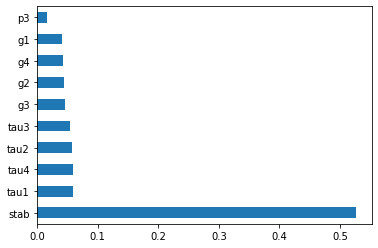

In [12]:
import matplotlib.pyplot as plt
feat_imp=pd.Series(tree.feature_importances_,index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

### XGBoost

In [13]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=1)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=1)

In [15]:
y_clf=tree.predict(X_test)

print("MSE:- ",mean_squared_error(y_test,y_clf))
print("MAE:- ",mean_absolute_error(y_test,y_clf))
print("R2:- ",r2_score(y_test,y_clf))

MSE:-  0.0115
MAE:-  0.0115
R2:-  0.9498394863563403


In [16]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_clf)

print('Accuracy: %.4f' % accuracy_score(y_test, y_clf))

Accuracy: 0.9885


### lightgbm

In [17]:
from lightgbm import LGBMClassifier

In [18]:
lgbm = LGBMClassifier(random_state=1)
lgbm.fit(X_train,y_train)

LGBMClassifier(random_state=1)

In [19]:
y_lgbm=tree.predict(X_test)

print("MSE:- ",mean_squared_error(y_test,y_lgbm))
print("MAE:- ",mean_absolute_error(y_test,y_lgbm))
print("R2:- ",r2_score(y_test,y_lgbm))

MSE:-  0.0115
MAE:-  0.0115
R2:-  0.9498394863563403


In [20]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_lgbm)

print('Accuracy: %.4f' % accuracy_score(y_test, y_lgbm))

Accuracy: 0.9885
